# Task 1: Load and Explore the Dataset

In this section, we will:
- Load the dataset
- Display the first few rows
- Check for missing values
- Explore data types
- Clean the dataset

# Task 1: Load and Explore the Dataset

In this section, we will:
- Load the dataset
- Display the first few rows
- Check for missing values
- Explore data types
- Clean the dataset

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales.csv")

# Display the first few rows
df.head()

,Date,Region,SalesPerson,Product,UnitsSold,UnitPrice,Revenue
0,2023-01-01,North,Bob,D,NaN,NaN,NaN
1,2023-01-02,NaN,Diana,A,NaN,24.16,NaN
2,2023-01-03,North,Charlie,A,NaN,NaN,NaN
3,2023-01-04,North,Alice,B,NaN,NaN,NaN
4,2023-01-05,West,Charlie,D,NaN,16.20,NaN


In [2]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         20 non-null     object 
 1   Region       16 non-null     object 
 2   SalesPerson  17 non-null     object 
 3   Product      20 non-null     object 
 4   UnitsSold    10 non-null     float64
 5   UnitPrice    8 non-null      float64
 6   Revenue      3 non-null      float64
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [3]:
# Display missing values per column
df.isnull().sum()


Date            0
Region          4
SalesPerson     3
Product         0
UnitsSold      10
UnitPrice      12
Revenue        17
dtype: int64

In [11]:
# Clean the dataset by filling missing values
df_cleaned = df.fillna({
    'Region': 'Unknown',
    'SalesPerson': 'Unknown',
    'UnitsSold': df['UnitsSold'].median(),
    'UnitPrice': df['UnitPrice'].median(),
    'Revenue': df['Revenue'].median()
})
df_cleaned.head()


,Date,Region,SalesPerson,Product,UnitsSold,UnitPrice,Revenue
0,2023-01-01,North,Bob,D,51.5,24.745,1317.16
1,2023-01-02,Unknown,Diana,A,51.5,24.160,1317.16
2,2023-01-03,North,Charlie,A,51.5,24.745,1317.16
3,2023-01-04,North,Alice,B,51.5,24.745,1317.16
4,2023-01-05,West,Charlie,D,51.5,16.200,1317.16


### Why Use the Median to Fill Missing Numerical Values?

When handling missing values in numerical columns such as `UnitsSold`, `UnitPrice`, and `Revenue`, we chose to use the **median** instead of the **mean**. This decision is based on several important considerations:

1. **Robustness to Outliers**:  
   The **mean** is sensitive to extreme values (outliers), which can skew the results and give a misleading representation of the data's central tendency. The **median**, on the other hand, represents the middle value and is not affected by unusually high or low values.

2. **Skewed Distributions**:  
   In many real-world datasets, the distribution of numerical variables is not perfectly symmetric. For example, most sales might be low, with a few large deals causing a long tail. In such cases, the **median** better represents a "typical" value.

3. **Preserves Data Integrity**:  
   By using the median, we avoid introducing artificial bias from outliers or extreme values that would distort downstream analysis (like averages or totals).

4. **Consistency in Imputation**:  
   Median imputation ensures that the replacement values are grounded in actual data patterns, which can lead to more accurate and reliable statistical and machine learning results.

Therefore, for columns like `UnitsSold`, `UnitPrice`, and `Revenue`, the **median** offers a safer and more stable method for handling missing data.



# Task 2: Basic Data Analysis

We will:
- Compute basic statistics
- Group data by categorical features
- Identify interesting patterns


In [12]:
# Basic statistics
df_cleaned.describe()


,UnitsSold,UnitPrice,Revenue
count,20.000000,20.000000,20.000000
mean,50.800000,26.187500,1297.974500
std,20.168631,6.783776,208.963074
min,9.000000,16.200000,507.490000
25%,51.375000,24.745000,1317.160000
50%,51.500000,24.745000,1317.160000
75%,51.625000,24.745000,1317.160000
max,97.000000,49.060000,1743.120000


In [13]:
# Group by Region and compute average Revenue
region_group = df_cleaned.groupby("Region")["Revenue"].mean()
region_group


Region
East       1047.270000
North      1317.160000
South      1317.160000
Unknown    1317.160000
West       1388.153333
Name: Revenue, dtype: float64

In [14]:
# Group by Product and compute average Units Sold
product_group = df_cleaned.groupby("Product")["UnitsSold"].mean()
product_group


Product
A    52.428571
B    40.750000
C    55.250000
D    53.642857
Name: UnitsSold, dtype: float64

# Task 3: Data Visualization

We will create:
- Line chart
- Bar chart
- Histogram
- Scatter plot


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: Revenue over time
plt.figure(figsize=(10,5))
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned.sort_values('Date', inplace=True)
plt.plot(df_cleaned['Date'], df_cleaned['Revenue'], marker='o')
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


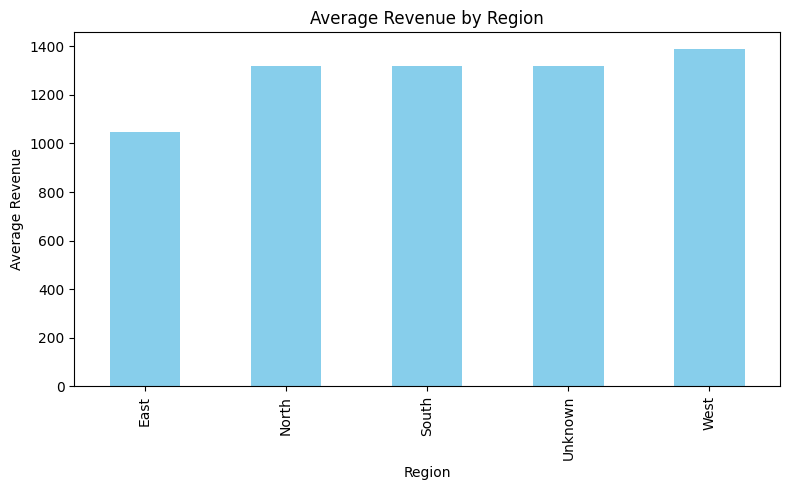

In [16]:
# Bar chart: Average Revenue by Region
plt.figure(figsize=(8,5))
region_group.plot(kind='bar', color='skyblue')
plt.title("Average Revenue by Region")
plt.ylabel("Average Revenue")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


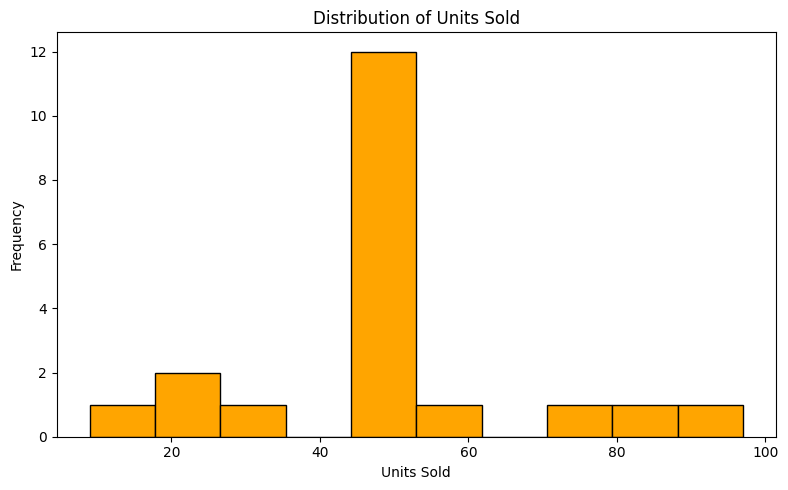

In [17]:
# Histogram: Distribution of Units Sold
plt.figure(figsize=(8,5))
plt.hist(df_cleaned['UnitsSold'], bins=10, color='orange', edgecolor='black')
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [19]:
# Scatter plot: Units Sold vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x="UnitsSold", y="Revenue", hue="Product")
plt.title("Units Sold vs Revenue")
plt.tight_layout()
plt.show()
